In [22]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import itertools
import warnings
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from pyramid.arima import auto_arima

In [2]:
df=pd.read_csv("dd.csv")
df1=df[df.ItemId==972142]

In [3]:
df2=df1[['WeekNoinTotal','QTY']]
df2=df2.set_index('WeekNoinTotal')
df2.head()

,QTY
WeekNoinTotal,
1,4
2,35
3,46
4,39
5,31


Text(0.5, 0, 'WeekNoinTotal')

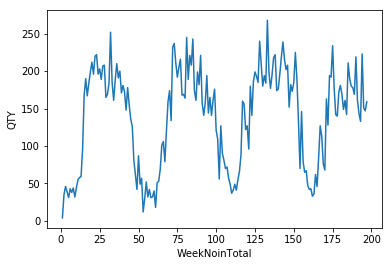

In [4]:
plt.plot(df2)
plt.ylabel('QTY')
plt.xlabel('WeekNoinTotal')

In [5]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean()
    #rolstd = pd.rolling_std(timeseries, window=52)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(10, 3))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','#Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    if (dfoutput['p-value']>0.05):
        print("Data is Not Stationary, Null hypothesis:Data is non-stationary cannot be rejected")
    else:
        print('Data is Stationary and Null hypothesis of data being non-stationary is rejected')

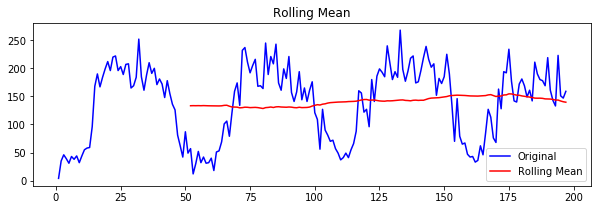

Results of Dickey-Fuller Test:
Test Statistic           -4.500403
p-value                   0.000196
#Lags Used                9.000000
#Observations Used      187.000000
Critical Value (1%)      -3.465812
Critical Value (5%)      -2.877123
Critical Value (10%)     -2.575077
dtype: float64
Data is Stationary and Null hypothesis of data being stationary is rejected


In [6]:
test_stationarity(df2['QTY'])

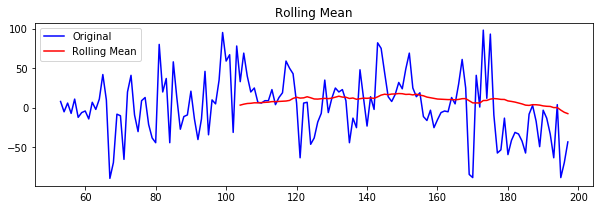

Results of Dickey-Fuller Test:
Test Statistic           -3.881626
p-value                   0.002174
#Lags Used                3.000000
#Observations Used      141.000000
Critical Value (1%)      -3.477601
Critical Value (5%)      -2.882266
Critical Value (10%)     -2.577822
dtype: float64
Data is Stationary and Null hypothesis of data being stationary is rejected


In [7]:
df2['seasonal_diff'] = df2.QTY - df2.QTY.shift(52)
test_stationarity(df2.seasonal_diff.dropna(inplace=False))

In [8]:
df2['seasonal_diff'].dropna(inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


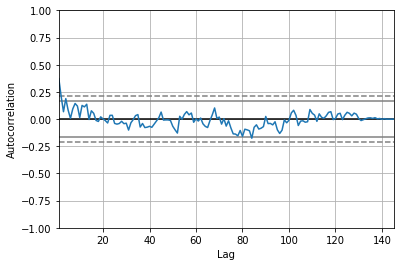

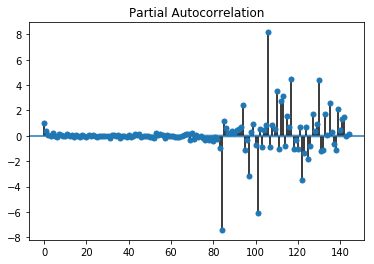

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
autocorrelation_plot(df2.seasonal_diff);
plot_pacf(df2.seasonal_diff);

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [11]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(df2['QTY'], order=param, seasonal_order=param_seasonal)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC:2545.750386981762
ARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC:1471.9134601837413
ARIMA(0, 0, 0)x(1, 0, 0, 52) - AIC:2140.729498256302
ARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC:1470.1555536739002
ARIMA(0, 0, 1)x(0, 0, 0, 52) - AIC:2344.069101846357
ARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC:1457.4064150815602
ARIMA(0, 0, 1)x(1, 0, 0, 52) - AIC:2213.167666265549
ARIMA(0, 0, 1)x(1, 1, 0, 52) - AIC:1454.6453433408542
ARIMA(0, 1, 0)x(0, 0, 0, 52) - AIC:1939.6042254946096
ARIMA(0, 1, 0)x(0, 1, 0, 52) - AIC:1493.964816774543
ARIMA(0, 1, 0)x(1, 0, 0, 52) - AIC:1935.5522973759494
ARIMA(0, 1, 0)x(1, 1, 0, 52) - AIC:1490.136856928689
ARIMA(0, 1, 1)x(0, 0, 0, 52) - AIC:1920.8760030394978
ARIMA(0, 1, 1)x(0, 1, 0, 52) - AIC:1450.03273764002
ARIMA(0, 1, 1)x(1, 0, 0, 52) - AIC:1911.8689699859679
ARIMA(0, 1, 1)x(1, 1, 0, 52) - AIC:1447.081829779689
ARIMA(1, 0, 0)x(0, 0, 0, 52) - AIC:1951.6475967273027
ARIMA(1, 0, 0)x(0, 1, 0, 52) - AIC:1451.9271237720873
ARIMA(1, 0, 0)x(1, 0, 0, 52) - AIC:19

In [12]:
model = sm.tsa.statespace.SARIMAX(df2['QTY'], order=(1,0,1), seasonal_order=(1,1,0,52))
result = model.fit()
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                QTY   No. Observations:                  197
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 52)   Log Likelihood                -721.000
Date:                            Fri, 28 Dec 2018   AIC                           1450.001
Time:                                    12:41:16   BIC                           1461.908
Sample:                                         0   HQIC                          1454.839
                                            - 197                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6058      0.143      4.241      0.000       0.326       0.886
ma.L1         -0.2655      0.168   

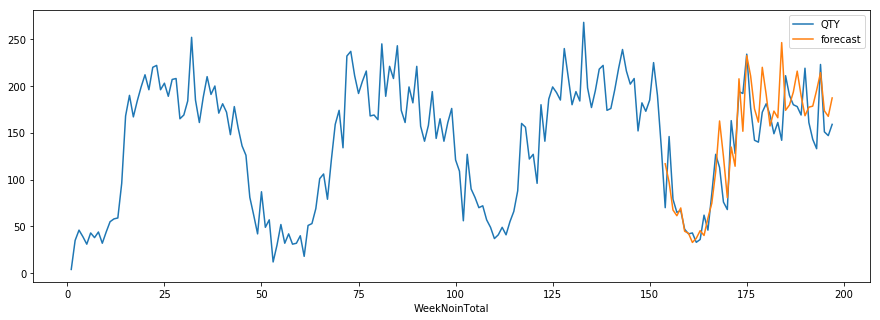

In [21]:
df2['forecast'] = result.predict(start = 154, end= 197)  
df2[['QTY', 'forecast']].plot(figsize=(15, 5))

In [14]:
predicted = df2['forecast']
truth = df2['QTY'].iloc[154:]
mse = ((predicted - truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 970.27


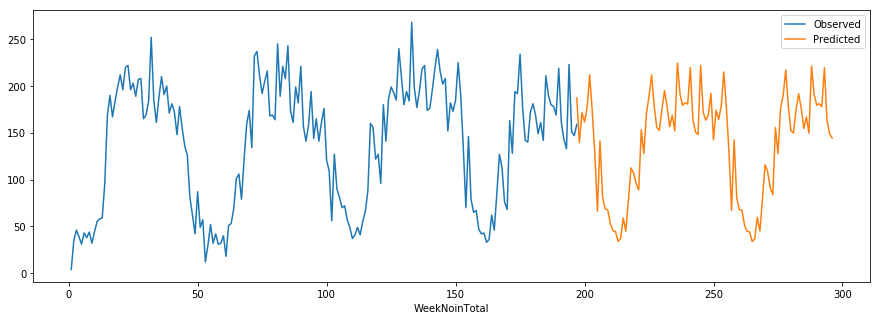

In [20]:
pred = result.get_forecast(steps=100)
ax = df2['QTY'].plot(figsize=(15, 5), label='Observed')
pred.predicted_mean.plot(ax=ax, label='Predicted')
plt.legend()

In [16]:
model1 = sm.tsa.statespace.SARIMAX(df2['QTY'], order=(1,1,1), seasonal_order=(1,1,0,52))
result1 = model1.fit()
print(result1.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                QTY   No. Observations:                  197
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 52)   Log Likelihood                -716.897
Date:                            Fri, 28 Dec 2018   AIC                           1441.795
Time:                                    12:41:33   BIC                           1453.674
Sample:                                         0   HQIC                          1446.622
                                            - 197                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2664      0.090      2.953      0.003       0.090       0.443
ma.L1         -0.9111      0.051   

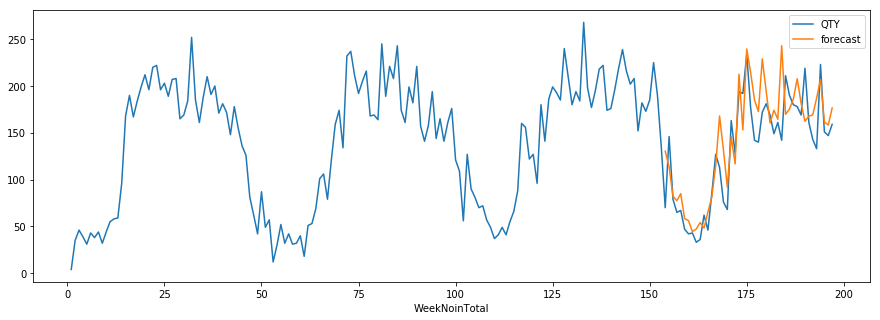

In [23]:
df2['forecast'] = result1.predict(start = 154, end= 197)  
df2[['QTY', 'forecast']].plot(figsize=(15, 5))

In [18]:
predicted = df2['forecast']
truth = df2['QTY'].iloc[154:]
mse = ((predicted - truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 964.04


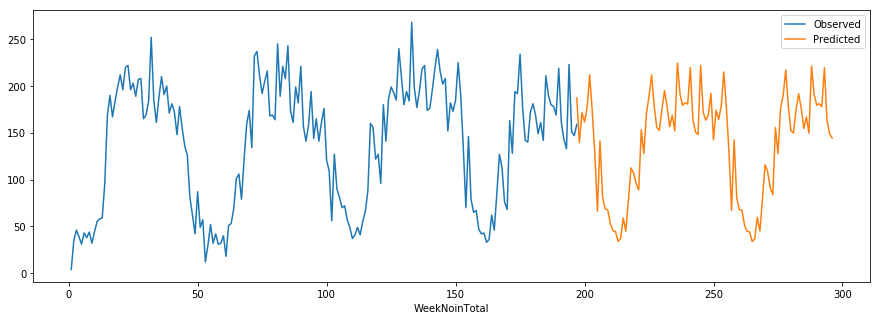

In [24]:
pred = result.get_forecast(steps=100)
ax = df2['QTY'].plot(figsize=(15, 5), label='Observed')
pred.predicted_mean.plot(ax=ax, label='Predicted')
plt.legend()